## Credit Card Fraud Case Study

### Importing basic modules

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_halving_search_cv
from sklearn.metrics import accuracy_score, mean_absolute_error ,mean_squared_error, confusion_matrix, median_absolute_error,classification_report, f1_score,recall_score,precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import HalvingRandomSearchCV,RandomizedSearchCV


import warnings
warnings.filterwarnings('ignore')



train = pd.read_csv('../input/fraud-detection/fraudTrain.csv')
test = pd.read_csv('../input/fraud-detection/fraudTest.csv')
test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


### Importing Data

In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

### Data Cleaning

In [35]:

for col in train.columns:
  print(f"{col}: {train[col].unique()}\n\n")


Unnamed: 0: [      0       1       2 ... 1296672 1296673 1296674]


trans_date_trans_time: ['2019-01-01 00:00:18' '2019-01-01 00:00:44' '2019-01-01 00:00:51' ...
 '2020-06-21 12:12:32' '2020-06-21 12:13:36' '2020-06-21 12:13:37']


cc_num: [   2703186189652095        630423337322      38859492057661
    3534093764340240     375534208663984    4767265376804500
      30074693890476    6011360759745864    4922710831011201
    2720830304681674       4642894980163     377234009633447
     180042946491150    5559857416065248    3514865930894695
    6011999606625827    6011860238257910    3565423334076143
    2348245054386329 4956828990005111019 4469777115158234880
    2305336922781618     180048185037117        630441765090
 4428780983793657331     343464013864032     374930071163758
    4334230547694630 4225990116481262579    4260059589824237
     180094608895855 4599735407877245080        630412733309
    2712209726293386     374125201044065     349612764943496
    3598215285024754     213

In [36]:

for col in train.columns:
  print(f"{col}: {test[col].unique()}\n\n")


Unnamed: 0: [     0      1      2 ... 555716 555717 555718]


trans_date_trans_time: ['2020-06-21 12:14:25' '2020-06-21 12:14:33' '2020-06-21 12:14:53' ...
 '2020-12-31 23:59:15' '2020-12-31 23:59:24' '2020-12-31 23:59:34']


cc_num: [   2291163933867244    3573030041201292    3598215285024754
    3591919803438423    3526826139003047      30407675418785
     213180742685905    3589289942931264    3596357274378601
    3546897637165774    2242542703101233        571465035400
    6593250708747804       4988304376504    6011504998544485
    4570636521433188 4906628655840914250    4908846471916297
 4861310130652566408    6538441737335434    2283743876903625
 4560004149983868183       4562827002127     213153151785052
     372509258176510    6011148190095209    6011917798331152
    3577663406369449    3502377050801561     180040027502291
     379897244598068     180048185037117    4302475216404898
     180036456789979     180065479077096    6517217825320610
    4683520018489354        501899

In [37]:
train['trans_date_trans_time'].value_counts()

trans_date_trans_time
2019-04-22 16:02:01    4
2020-06-02 12:47:07    4
2020-06-01 01:37:47    4
2020-03-30 23:35:21    3
2020-05-11 14:27:33    3
                      ..
2019-07-13 18:35:46    1
2019-07-13 18:35:41    1
2019-07-13 18:34:19    1
2019-07-13 18:33:57    1
2019-07-13 18:41:16    1
Name: count, Length: 1274791, dtype: int64

Converting dob,trans_date_trans_time  column in both test & train to datetime data type and creating new 'trans_date' column -

In [38]:
train['trans_date_trans_time'] = pd.to_datetime(train['trans_date_trans_time'])
train['trans_date'] = train['trans_date_trans_time'].dt.date
train['dob'] = pd.to_datetime(train['dob'])

test['trans_date_trans_time'] = pd.to_datetime(test['trans_date_trans_time'])
test['trans_date'] = test['trans_date_trans_time'].dt.date
test['dob'] = pd.to_datetime(test['dob'])



Removing unnamed column

In [39]:
test[['trans_date', 'dob']].head(), train[['trans_date', 'dob']].head()

train.drop("Unnamed: 0", axis=1, inplace=True)
test.drop("Unnamed: 0", axis=1, inplace=True)
train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01


### EDA, Feature Engineering

### Categorical Variable Analysis

In [40]:
df = pd.concat([test,train])

In [41]:
df["is_fraud_cat"] = df.is_fraud.apply(lambda x: "T" if x == 1 else "F").astype("category")

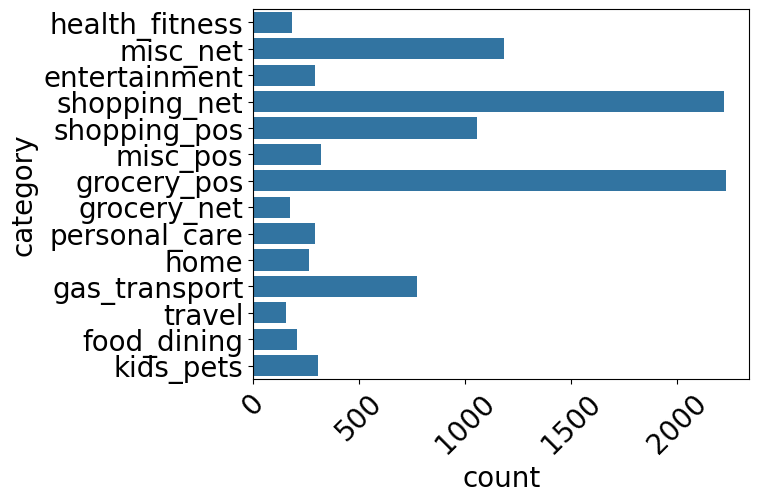

In [42]:
sns.countplot(df[df['is_fraud_cat']=="T"].category)
plt.xticks(rotation=45)
plt.show()

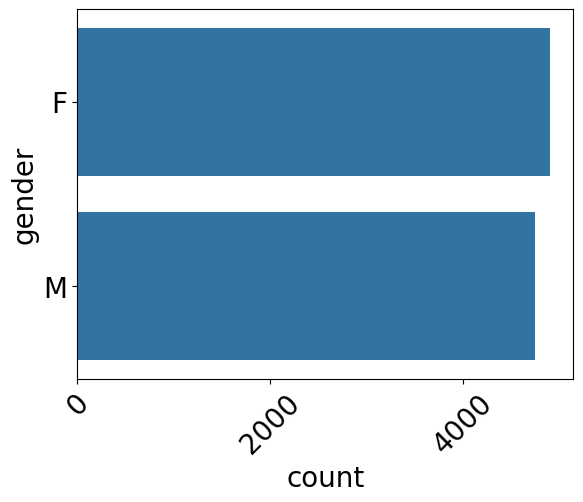

In [43]:
sns.countplot(df[df['is_fraud_cat']=="T"].gender)
plt.xticks(rotation=45)
plt.show()

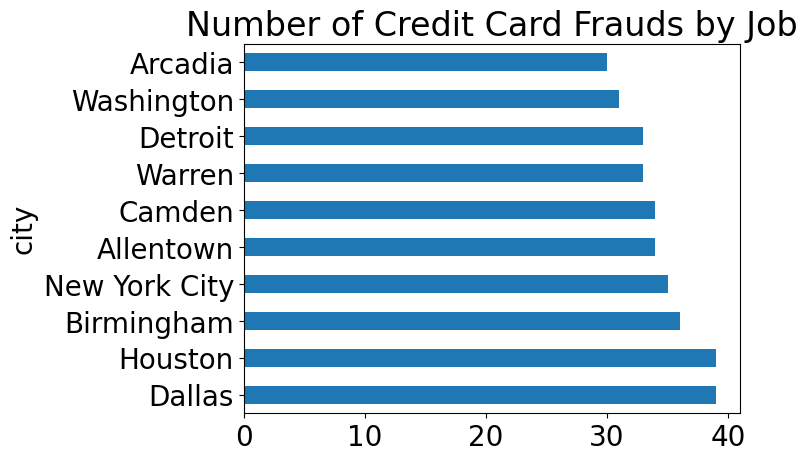

In [44]:
df[df['is_fraud_cat']=="T"]["city"].value_counts(sort=True).head(10).plot(kind="barh")
plt.title("Number of Credit Card Frauds by City")
plt.title("Number of Credit Card Frauds by Job")

plt.show()

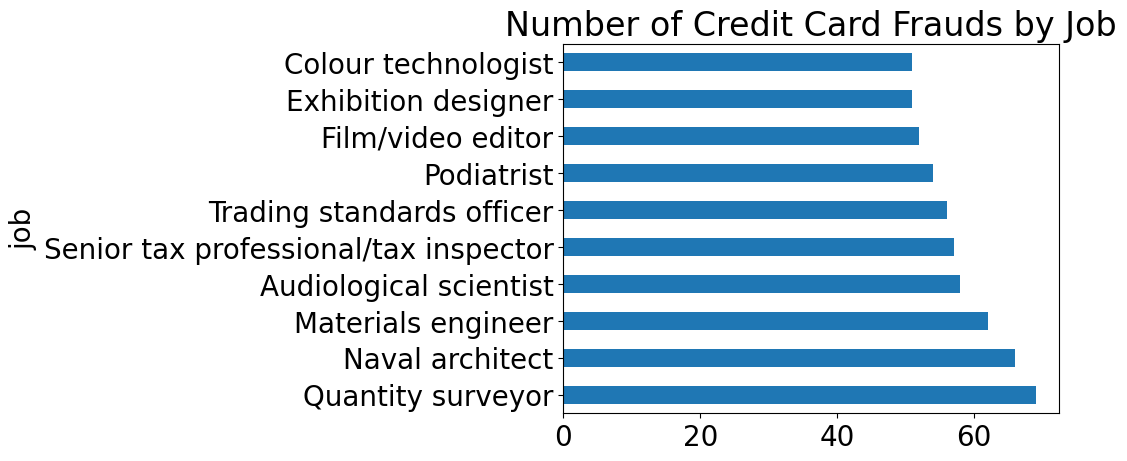

In [45]:
df[df['is_fraud_cat']=="T"]['job'].value_counts(sort=True).head(10).plot(kind="barh")
plt.title("Number of Credit Card Frauds by Job")
plt.show()

[link text](https://)### Numerical Variable Analysis
checking the spread & skewness of all numerical variables

In [ ]:
del df['is_fraud_cat']
from scipy.stats import norm, skew

#finding numerical columns
testnum= test.select_dtypes(include=np.number)
test[testnum.columns]

# df.isnull().sum()

# df[testnum.columns].info()

# plt.rcParams.update({'font.size': 10})
# skewness = str(skew(df['amt']))
# sns.distplot(df['amt'],fit = norm,color = randomcolor())
# plt.title("Skewness of amt"+" = "+skewness)
# plt.show()

# skewness = str(skew(df['city_pop']))
# sns.distplot(df['city_pop'],fit = norm,color = randomcolor())
# plt.title("Skewness of population"+" = "+skewness)
# plt.show()

# sns.distplot(df['is_fraud'],fit = norm,color = randomcolor())
# plt.title("Distribution of is_fraud")
# plt.show()

# df.info()

# plt.figure(figsize=(8,5))
# ax = sns.countplot(x="is_fraud", data=df,color=randomcolor())
# for p in ax.patches:
#      ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
# plt.show()

df["age"] = df["trans_date"]-df["dob"]
df["age"]=df["age"].astype('timedelta64[Y]')
print(df["age"].head())
# print(df.info())

fraud=df[df["is_fraud"]==1]
# fig, ax = plt.subplots()
# ax.hist(fraud.age, edgecolor = "black", bins = 5, color=randomcolor())
# plt.title("Number of Credit Card Frauds by Age Groups")
# plt.show()

df['trans_month'] = pd.DatetimeIndex(df['trans_date']).month
df['trans_year'] = pd.DatetimeIndex(df['trans_date']).year

import calendar
df['Month_name'] = df['trans_month'].apply(lambda x: calendar.month_abbr[x])

# sns.countplot(df[df["is_fraud"]==1]["Month_name"],color=randomcolor())
# plt.title("Number of Credit Card Frauds by month")
# plt.show()
del df['Month_name']

# sns.countplot(df[df["is_fraud"]==1]["gender"],color=randomcolor())
# plt.title("Number of Credit Card Frauds by Gender")
# plt.show()

# sns.countplot(df[df["is_fraud"]==1]["trans_year"],color=randomcolor())
# plt.title("Number of Credit Card Frauds by year")
# plt.show()

df['latitudinal_distance'] = abs(round(df['merch_lat']-df['lat'],3))
df['longitudinal_distance'] = abs(round(df['merch_long']-df['long'],3))

fraud = df[df["is_fraud"]==1]
# fig, ax = plt.subplots()
# ax.hist(fraud.latitudinal_distance, edgecolor = "black", bins = 5, color=randomcolor())
# plt.title("Number of Credit Card Frauds by latitudinal distance")
# plt.show()

# fig, ax = plt.subplots()
# ax.hist(fraud.longitudinal_distance, edgecolor = "black", bins = 5, color=randomcolor())
# plt.title("Number of Credit Card Frauds by longitudinal distance")
# plt.show()

# print(df.info())

# print(df.gender.value_counts())

df.gender=df.gender.apply(lambda x: 1 if x=="M" else 0)
df.gender.value_counts()


# df.info()

df = pd.get_dummies(df,columns=['category'],drop_first=True)
print(df.info())
df.head()

In [25]:
numbers = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numbers.corr()

fraud_correlation = correlation_matrix['is_fraud'].sort_values(ascending=False)
print(fraud_correlation)

is_fraud      1.000000
amt           0.209308
lat           0.002904
merch_lat     0.002778
long          0.001022
merch_long    0.000999
city_pop      0.000325
cc_num       -0.001125
zip          -0.002190
unix_time    -0.013329
Name: is_fraud, dtype: float64


In [48]:
drop_cols = ['trans_date_trans_time','city','lat','long','job','dob','merch_lat','merch_long','trans_date','state']
df=df.drop(drop_cols,axis=1)

KeyError: "['trans_date_trans_time', 'city', 'lat', 'long', 'job', 'dob', 'merch_lat', 'merch_long', 'trans_date', 'state'] not found in axis"

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 1296674
Data columns (total 5 columns):
 #   Column    Dtype  
---  ------    -----  
 0   category  object 
 1   amt       float64
 2   gender    object 
 3   city_pop  int64  
 4   is_fraud  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 84.8+ MB


In [50]:
df.drop(['cc_num','merchant','first','last','street','zip','trans_num','unix_time'],axis=1,inplace=True)


[link text](https://)Dropping final set of variables not useful for model building

In [53]:
df.drop(['is_fraud_cat'],axis=1,inplace=True)
